In [2]:
import sys
sys.path.append('..')

import os

import cv2
import numpy as np
import pydicom
import matplotlib.pyplot as plt

from ipywidgets.widgets import interact, IntSlider, fixed
import ipywidgets as widgets

from src.visualisation import PatientSnapshot
from src.segmentation import threshold_segmentation
from src.segmentation import morph_snakes_segmentation
from src.utils import remove_legs, are_legs

In [3]:
patient_path = '../data/1/'
patient = PatientSnapshot.from_path(patient_path, mask_path=None)

In [4]:
%%time

patient.snapshot = remove_legs(patient.snapshot)

CPU times: user 16.4 ms, sys: 10.1 ms, total: 26.5 ms
Wall time: 69 ms


## Threshold segmentation

In [5]:
%%time

mask = threshold_segmentation(patient.snapshot)
patient.mask = mask

CPU times: user 1.42 s, sys: 1.02 s, total: 2.44 s
Wall time: 2.94 s


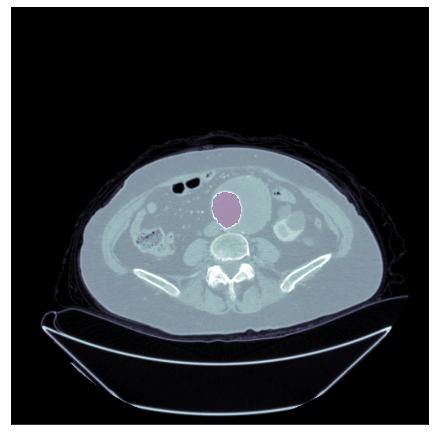

In [6]:
# Static plot
patient.horizontal_plot(z=200, vmin=-1000, vmax=500, plot_mask=True)

In [7]:
# Interactive plot
interact(patient.horizontal_plot, 
         z=IntSlider(min=0, max=patient.shape[0]-1, value=581, continious_update=False), 
         vmin=IntSlider(min=-1000, max=1000, value=-1000, continious_update=False), 
         vmax=IntSlider(min=-1000, max=1000, value=500, continious_update=False),
)

interactive(children=(IntSlider(value=536, description='z', max=536), IntSlider(value=-1000, description='vmin…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

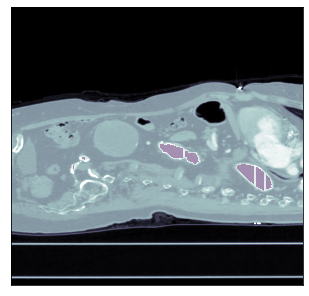

In [8]:
patient.longitudinal_plot(x=300, vmin=-1000, vmax=500, plot_mask=True)

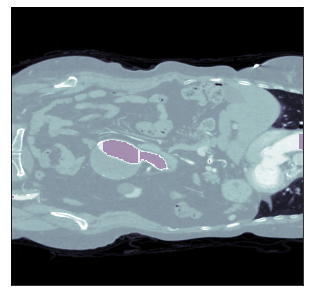

In [9]:
patient.frontal_plot(y=250, vmin=-1000, vmax=500, plot_mask=True)

In [10]:
# threshold = 300
# aspectratio = dict(x=1, y=1, z=1)
# patient.plot_3d(threshold, aspectratio=aspectratio)

## Morphological snakes segmentation

In [11]:
aneurism_center = (200, 240, 280)
radius = 20
num_iterations = 250
balloon = 1.5  # толерантность к отсутствию градиента
z = 200
mask = morph_snakes_segmentation(patient.snapshot,
                                start_point=aneurism_center,
                                start_radius=radius,
                                num_iterations=num_iterations,
                                balloon=balloon,
                                z=z)
patient.mask = mask

KeyboardInterrupt: 

In [ ]:
patient.horizontal_plot(z=200, vmin=-1000, vmax=500, plot_mask=True)

In [20]:
start_point=aneurism_center
start_radius=radius
num_iterations=num_iterations
balloon=balloon
z=z
snapshot = patient.snapshot
import morphsnakes as ms

In [21]:
img = snapshot
# get the gaussian gradient for higher contrast
gimg = img#ms.inverse_gaussian_gradient(img, alpha=5.0, sigma=5.0)

In [22]:
# level_set is the starting
level_set = ms.circle_level_set(img.shape, start_point, start_radius)

In [ ]:
# mask = ms.morphological_geodesic_active_contour(gimg.astype('float64'), num_iterations, level_set, balloon=balloon)
# repeat the 2D mask so that it is the same size as the image
# mask = np.repeat(mask[np.newaxis, :, :], snapshot.shape[0], axis=0)

ms.morphological_chan_vese(img, iterations=150,
                               init_level_set=level_set,
                               smoothing=1, lambda1=1, lambda2=2)